# **FINAL**

# **1. Data Preparation**

# **a. Data Cleaning**

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Impute missing values for numeric columns using the mean
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Remove duplicates
df.drop_duplicates(inplace=True)

# handle outliers using Z-score
z_scores = np.abs(stats.zscore(df['Cholesterol']))
df = df[(z_scores < 3)]

# 'Heart Disease' column to numeric values
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


## **b. Data Splitting**

In [46]:
# Define features and target variable
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **2. Building the Logistic Regression Model**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# **3. Model Evaluation**

Accuracy: 0.87
Precision: 0.79
Recall: 0.90
F1-Score: 0.84

Confusion Matrix: 



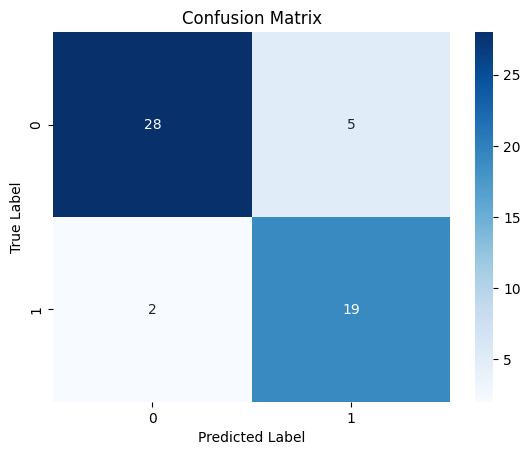


               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.79      0.90      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}\n')


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
print("Confusion Matrix: \n")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\n " + classification_report(y_test, y_pred))


# **4. Analysing Model Features**

In [49]:
# Get the coefficients from the model
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns)

# Print feature importance
print("Feature Importance:")
print(feature_importance.sort_values(ascending=False))


Feature Importance:
Number of vessels fluro    0.890907
Sex                        0.635689
Thallium                   0.619889
Cholesterol                0.590646
Chest pain type            0.558576
Exercise angina            0.536350
ST depression              0.415171
BP                         0.360489
EKG results                0.267781
Slope of ST                0.123928
FBS over 120              -0.222866
Age                       -0.233051
Max HR                    -0.516090
dtype: float64
